In [186]:
!pip install highlight_text

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from mplsoccer import Bumpy, FontManager, add_image
from highlight_text import fig_text

In [8]:
epl = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/E0.csv")
ep = epl[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl = epl.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl.head()

,Div,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86


In [9]:
epl['Date']= pd.to_datetime(epl['Date'], format='%d/%m/%Y')

In [10]:
epl.columns[:53]

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH',
       'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5'],
      dtype='object')

In [11]:
epl[(epl['HomeTeam']=='Chelsea') | (epl['AwayTeam']=='Chelsea')]

,Div,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
6,E0,2022-08-06,17:30,Everton,Chelsea,0,1,A,0,1,...,1.77,1.00,1.93,2.00,1.94,1.98,1.94,2.11,1.88,2.00
18,E0,2022-08-14,16:30,Chelsea,Tottenham,2,2,D,1,0,...,1.93,-0.25,1.86,2.04,1.87,2.07,1.92,2.07,1.86,2.02
26,E0,2022-08-21,14:00,Leeds,Chelsea,3,0,H,2,0,...,2.32,1.00,2.06,1.84,2.06,1.87,2.12,1.94,2.03,1.84
33,E0,2022-08-27,15:00,Chelsea,Leicester,2,1,H,0,0,...,2.32,-1.25,1.86,2.04,1.88,2.05,1.95,2.08,1.88,2.00
42,E0,2022-08-30,19:45,Southampton,Chelsea,2,1,H,2,1,...,2.09,0.75,2.05,1.85,2.05,1.88,2.11,1.88,2.06,1.83
52,E0,2022-09-03,15:00,Chelsea,West Ham,2,1,H,0,0,...,1.94,-0.75,1.88,2.02,1.88,2.05,1.91,2.10,1.85,2.03
69,E0,2022-10-01,15:00,Crystal Palace,Chelsea,1,2,A,1,1,...,1.85,0.75,1.91,1.99,1.90,2.03,1.95,2.03,1.88,1.98
78,E0,2022-10-08,15:00,Chelsea,Wolves,3,0,H,1,0,...,1.91,-1.00,1.89,2.01,1.91,2.02,1.91,2.13,1.86,2.01
92,E0,2022-10-16,14:00,Aston Villa,Chelsea,0,2,A,0,1,...,1.79,0.50,1.84,2.06,1.87,2.07,1.92,2.12,1.87,2.01
100,E0,2022-10-19,19:30,Brentford,Chelsea,0,0,D,0,0,...,1.92,0.50,2.03,1.87,2.05,1.88,2.08,1.90,2.03,1.85


In [6]:
epl['HomeTeam'] = np.where((epl['Date'] <= '2021-01-19') & (epl['HomeTeam'] == 'Chelsea'), 'Chelsea_Lampard', epl['HomeTeam'])
epl['AwayTeam'] = np.where((epl['Date'] <= '2021-01-19') & (epl['AwayTeam'] == 'Chelsea'), 'Chelsea_Lampard', epl['AwayTeam'])
epl['HomeTeam'] = np.where((epl['Date'] > '2021-01-19') & (epl['HomeTeam'] == 'Chelsea'), 'Chelsea_Tuchel', epl['HomeTeam'])
epl['AwayTeam'] = np.where((epl['Date'] > '2021-01-19') & (epl['AwayTeam'] == 'Chelsea'), 'Chelsea_Tuchel', epl['AwayTeam'])

In [54]:
epl[(epl['HomeTeam']=='Chelsea_Lampard') | (epl['AwayTeam']=='Chelsea_Lampard')]

,Div,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
6,E0,2020-09-14,20:15,Brighton,Chelsea_Lampard,1,3,A,0,1,...,2.17,1.00,1.93,1.97,1.94,1.98,2.02,2.02,1.93,1.95
14,E0,2020-09-20,16:30,Chelsea_Lampard,Liverpool,0,2,A,0,0,...,2.34,0.25,2.07,1.86,2.04,1.89,2.19,1.89,2.08,1.81
20,E0,2020-09-26,17:30,West Brom,Chelsea_Lampard,3,3,D,3,0,...,2.46,1.25,1.89,2.01,1.90,2.03,2.01,2.11,1.88,2.01
28,E0,2020-10-03,12:30,Chelsea_Lampard,Crystal Palace,4,0,H,0,0,...,2.08,-1.00,1.93,2.00,1.95,1.97,1.95,2.08,1.90,1.98
39,E0,2020-10-17,15:00,Chelsea_Lampard,Southampton,3,3,D,2,1,...,2.51,-1.00,2.00,1.90,2.06,1.88,2.08,1.98,1.97,1.91
51,E0,2020-10-24,17:30,Man United,Chelsea_Lampard,0,0,D,0,0,...,2.17,0.00,1.93,2.00,1.93,2.00,1.98,2.05,1.90,1.98
60,E0,2020-10-31,15:00,Burnley,Chelsea_Lampard,0,3,A,0,1,...,2.02,1.00,1.83,2.07,1.84,2.10,1.94,2.12,1.84,2.04
72,E0,2020-11-07,17:30,Chelsea_Lampard,Sheffield United,4,1,H,2,1,...,2.09,-1.25,1.86,2.07,1.89,2.04,1.91,2.11,1.86,2.03
78,E0,2020-11-21,12:30,Newcastle,Chelsea_Lampard,0,2,A,0,1,...,2.20,1.25,1.92,2.01,1.90,2.03,1.94,2.05,1.88,2.00
94,E0,2020-11-29,16:30,Chelsea_Lampard,Tottenham,0,0,D,0,0,...,2.14,-0.50,2.02,1.88,2.00,1.93,2.05,1.93,2.02,1.86


In [55]:
epl[(epl['HomeTeam']=='Chelsea_Tuchel') | (epl['AwayTeam']=='Chelsea_Tuchel')]

,Div,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
190,E0,2021-01-27,18:00,Chelsea_Tuchel,Wolves,0,0,D,0,0,...,1.82,-0.75,1.84,2.09,1.84,2.10,1.86,2.12,1.82,2.06
201,E0,2021-01-31,12:00,Chelsea_Tuchel,Burnley,2,0,H,1,0,...,2.08,-1.50,2.08,1.73,2.14,1.79,2.18,1.96,2.03,1.84
214,E0,2021-02-04,20:00,Tottenham,Chelsea_Tuchel,0,1,A,0,1,...,1.80,0.50,1.92,2.01,1.93,1.99,1.95,2.07,1.89,1.99
223,E0,2021-02-07,19:15,Sheffield United,Chelsea_Tuchel,1,2,A,0,1,...,1.87,1.00,2.01,1.92,1.99,1.93,2.10,1.96,2.02,1.86
234,E0,2021-02-15,20:00,Chelsea_Tuchel,Newcastle,2,0,H,2,0,...,2.19,-1.50,1.91,2.02,1.88,2.05,1.99,2.10,1.91,1.97
238,E0,2021-02-20,12:30,Southampton,Chelsea_Tuchel,1,1,D,1,0,...,1.98,0.75,1.77,2.02,1.83,2.09,1.93,2.13,1.85,2.04
255,E0,2021-02-28,16:30,Chelsea_Tuchel,Man United,0,0,D,0,0,...,1.92,-0.25,2.05,1.85,2.07,1.87,2.08,1.91,2.02,1.86
264,E0,2021-03-04,20:15,Liverpool,Chelsea_Tuchel,0,1,A,0,1,...,1.93,-0.25,1.95,1.98,1.95,1.97,1.97,2.03,1.91,1.98
273,E0,2021-03-08,18:00,Chelsea_Tuchel,Everton,2,0,H,1,0,...,1.77,-0.75,1.88,2.05,1.88,2.04,1.88,2.14,1.82,2.08
277,E0,2021-03-13,12:30,Leeds,Chelsea_Tuchel,0,0,D,0,0,...,2.05,0.75,2.02,1.91,2.02,1.90,2.11,1.94,2.00,1.90


In [15]:
#Chelsea under Lampard vs Tuchel
teams = ['Chelsea']

#dictionary to store data
team_dfs = dict()
for team in teams:
    #empty dataframe
    team_df = pd.DataFrame(columns = ["Points"])
    #get matches by this team
    matches = epl.loc[(epl['AwayTeam'] == team) | (epl['HomeTeam'] == team)]
    #auxilliary variable that will be helpful to plot
    # if (team == 'Chelsea_Tuchel'):
    #     game = 19
    # else:
    #     game = 0
    game = 0
    for i, match in matches.iterrows():
        game += 1
   
        #if team was away
        if match['AwayTeam'] == team:
            #get goals for both teams
            goalsfor = match['AwayGoals']
            goalsagainst = match['HomeGoals']
            #assign 3 points if win, 1 if draw, 0 if lost
            if match['FTR'] == 'A':
                points = 3
            elif match['FTR'] == 'D':
                points = 1
            else:
                points = 0
        else:
            #geat goals for both teams
            goalsfor = match['HomeGoals']
            goalsagainst = match['AwayGoals']
            #assign 3 points if win, 1 if draw, 0 if lost
            if match['FTR'] == 'H':
                points = 3
            elif match['FTR'] == 'D':
                points = 1
            else:
                points = 0
                #assign value to dataframe
        team_df.at[i, "Points"] = points
        # team_df.at[i, "Game"] = game
    #calculate rolling average
    team_df['PointsRA'] = team_df['Points'].rolling(window=5, win_type='triang').mean()
    #append df
    team_dfs[team] = team_df

In [16]:
team_dfs.keys()

dict_keys(['Chelsea'])

In [17]:
season_dict = dict()
for club in team_dfs.keys():
    season_dict[club ] = team_dfs[club]['PointsRA']

In [18]:
season_dict

{'Chelsea': 6           NaN
 18          NaN
 26          NaN
 33          NaN
 42     1.222222
 52     1.444444
 69     1.666667
 78     2.333333
 92     2.666667
 100    2.777778
 109    2.333333
 119    1.555556
 131    0.888889
 142    0.333333
 153    0.444444
 165    0.777778
 175    1.222222
 176    1.000000
 184    0.888889
 Name: PointsRA, dtype: float64}

In [19]:
font_normal = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                          "roboto/Roboto%5Bwdth,wght%5D.ttf")
font_bold = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                        "robotoslab/RobotoSlab%5Bwght%5D.ttf")

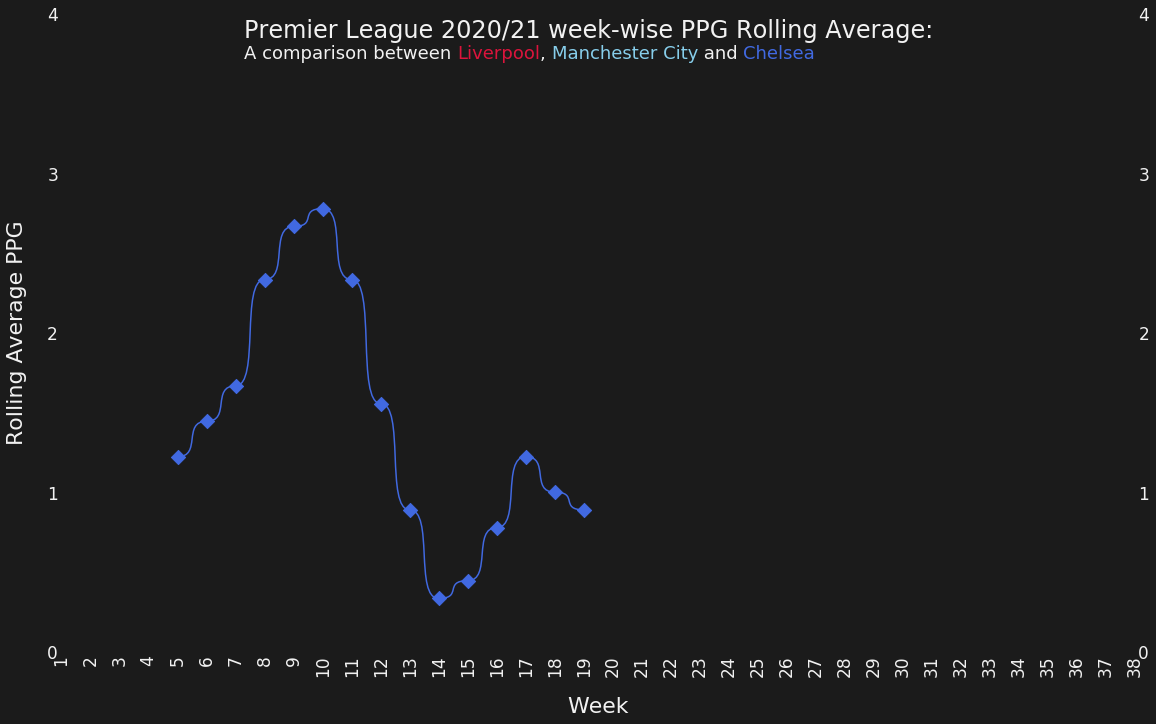

In [20]:
# match-week
match_day = [str(num) for num in range(1, 39)]

# highlight dict --> team to highlight and their corresponding colors
highlight_dict = {
    # "Liverpool": "crimson",
    # "Man City": "skyblue",
    "Chelsea": "royalblue"
}

# instantiate object
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=22,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.5,  # y label alignment
    alignment_xvalue=0.5  # x label alignment
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(0, 4, 5).astype(int),  # position value from 1 to 20
    values=season_dict,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(16, 10),  # size of the figure
    x_label='Week', y_label='Rolling Average PPG',  # label name
    ylim=(1, 5),  # y-axis limit
    lw=1.5,   # linewidth of the connecting lines
    upside_down=True,
    # fontproperties=font_normal.prop,   # fontproperties for ticklables/labels
)

# title and subtitle
TITLE = "Premier League 2020/21 week-wise PPG Rolling Average:"
SUB_TITLE = "A comparison between <Liverpool>, <Manchester City> and <Chelsea>"

# add title
fig.text(0.21, 0.95, TITLE, size=24, color="#F2F2F2")

# add subtitle
fig_text(
    0.21, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": 'crimson'}, {"color": 'skyblue'}, {"color": 'royalblue'}],
    size=18, fig=fig
)

# add image
# fig = add_image(
#      epl,
#      fig,  # figure
#      0.02, 0.9,  # left and bottom dimensions
#      0.08, 0.08  # height and width values
# )

# if space is left in the plot use this
plt.tight_layout(pad=0.5)

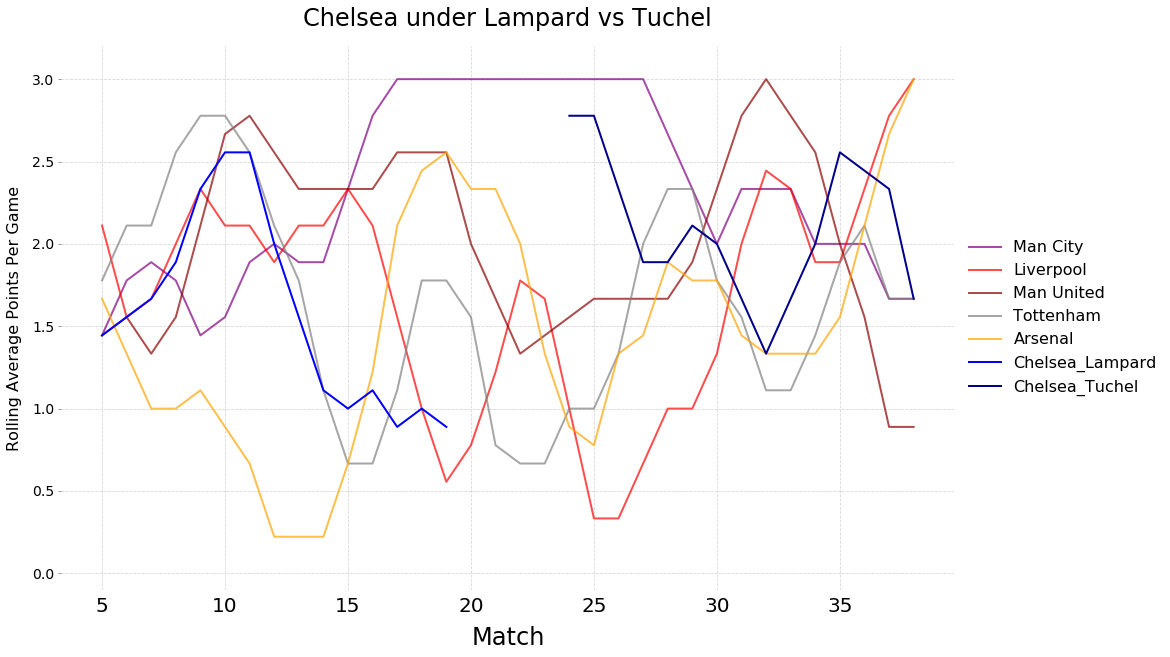

In [100]:
#create plot
fig, ax = plt.subplots(figsize=(16, 10))
colors = ['purple', 'red', 'darkred', 'grey', 'orange', 'blue', 'darkblue']
alphas = [0.7, 0.7, 0.7, 0.7, 0.7, 1, 1]
for club, color, alpha in zip(teams, colors, alphas):
    ax.plot(team_dfs[club]['Game'],  team_dfs[club]['PointsRA'], linewidth=2, linestyle='-',color=color, alpha = alpha, zorder = 2, label = club)

#set title
ax.set_title("Chelsea under Lampard vs Tuchel", fontsize = 24, pad=20)
#make visible ticks for beginning of each season
# ax.set_xticks(np.arange(0, max(team_dfs["Liverpool"]['Game']) + 38, 38))
#no text
# ax.set_xticklabels([])
#make ticks in the middle
# ax.set_xticks(np.arange(0, max(team_dfs["Liverpool"]['Game']), 38) + 19, minor=True)
#put season text in the middle of season
# ax.set_xticklabels(seasonst, minor=True)
#set axis limits
# ax.set_xlim(0, max(team_dfs["Liverpool"]['Game']) + 10)

ax.set_ylim(-0.1,3.2)
#disable black ticks, but big text xaxis
ax.tick_params(axis='x', color='white', which='both', labelsize = 20)
#grey y ticks
ax.tick_params(axis='y', color='grey', labelsize = 14)
#add grid
ax.grid(zorder = 1, linestyle = "--", alpha = 0.5)
#disable spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#add axis labels
ax.set_ylabel('Rolling Average Points Per Game', fontsize = 16,labelpad=10)
ax.set_xlabel('Match', fontsize = 24, labelpad=10)
#make legend
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left",fontsize=16, edgecolor='white')
plt.show()